In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import colorlover as cl
colors = [[i / 255 for i in j] for j in cl.to_numeric(cl.scales['5']['qual']['Dark2'])]

In [3]:
ny_map = pd.read_json("ny_map_data_res80.json")

In [4]:
county_shapes = pd.read_csv("ny_new_county_shapes.csv")

In [5]:
ny_map["lng_rank"] = ny_map.lng.rank(method = "dense")
ny_map["lat_rank"] = ny_map.lat.rank(method = "dense")

In [6]:
ny_map["nyc"] = ny_map.county_name.map(lambda x: x in ["New York", "Bronx", "Richmond", "Kings", "Queens"])

In [7]:
ny_map_restricted = ny_map[ny_map.state == "NY"]

In [8]:
ny_map_county_shapes = ny_map_restricted.merge(right = county_shapes, left_on = ["county_name"], right_on = ["county"], how= "left")

In [9]:
ny_map_county_shapes.columns

Index(['county_name', 'lat', 'lng', 'state', 'lng_rank', 'lat_rank', 'nyc',
       'min_lng_rank', 'min_lat_rank', 'max_lng_rank', 'max_lat_rank',
       'num_squares', 'county', 'ttl', 'pre_mult', 'mult', 'sqrt_mult',
       'mid_lng_rank', 'mid_lat_rank', 'lat_rank_range', 'scaled_min_lat_rank',
       'scaled_max_lat_rank', 'lng_rank_range', 'scaled_min_lng_rank',
       'scaled_max_lng_rank', 'new_mid_lat_rank', 'new_mid_lng_rank', 'dummy'],
      dtype='object')

In [10]:
for i in ["lng", "lat"]:
    ny_map_county_shapes["{}_mid_diff".format(i)] = ny_map_county_shapes["new_mid_{}_rank".format(i)] - ny_map_county_shapes["mid_{}_rank".format(i)]
    ny_map_county_shapes["scaled_{}_rank".format(i)] = ny_map_county_shapes.apply(
        lambda x: x["{}_mid_diff".format(i)] + x["{}_rank".format(i)] + x["sqrt_mult"] * (x["{}_rank".format(i)] - x["mid_{}_rank".format(i)]),
        axis = 1)

In [11]:
def ny_scatter(df):
    fig, ax = plt.subplots(figsize = (8, 8))
    for ind, county in enumerate(df.county_name.unique()):
        county_df = df[df.county_name == county]
        ax.scatter(
            y = county_df.scaled_lat_rank,
            x = county_df.scaled_lng_rank,
            s = county_df.sqrt_mult,
            marker = "s",
            label = county,
            alpha = 0.7,
            color = colors[ind % 5],
            edgecolor = "none")
    # ax.legend(loc = 9, bbox_to_anchor = (0.5,0))
    return fig

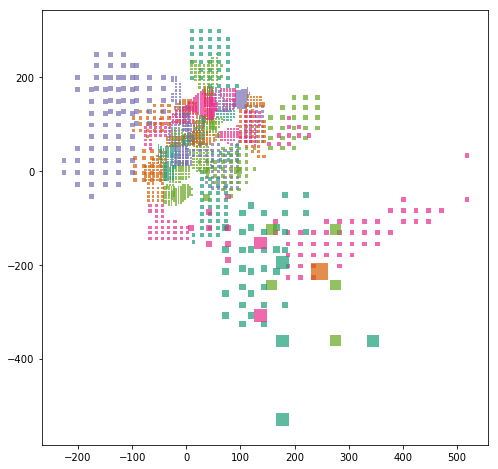

In [12]:
fig = ny_scatter(ny_map_county_shapes)